# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias는 선형 회귀 모델 학습 과정에서 최적화해야 하는 파라미터다.
  - 가중치는 각 feature(X) 가 target(y)에 미치는 영향도를 나타내는 값이다.
  - 양수 가중치는 target값을 증가시키고, 음수 가중치는 감소시킨다. 0에서 멀 수록 target에 큰 영향을 미치는 feature이며, 0에 가까울수록 target과의 연관성이 적은 feature다.
  - bias는 모든 feature가 0일 때의 target 값이다. 
- $\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b$
    - $\hat{y_i}$: 예측값
    - $x$: 특성(feature-컬럼)
    - $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
    - $b$: 절편
    - $p$: p 번째 특성(feature)/p번째 가중치
    - $i$: i번째 관측치(sample)

## 실습
#### Boston housing dataset loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data, x,y 분리
df = pd.read_csv("data/boston_dataset.csv")
X = df.drop(columns='MEDV')
y = df['MEDV']

# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
- 학습 결과 속성(Instance 변수)
    - **coef_**: 각 Feature에 곱하는 가중치 (찾은 파라미터)
    - **intercept_**: y절편. 모든 Feature가 0일때 예측값
    
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [3]:
# 전처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [5]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [6]:
## 학습을 통해 찾은 weights 와 bias 조회
print("weights")
print(lr.coef_)

weights
[-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]


In [7]:
import pandas as pd
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.970820
ZN         1.057149
INDUS      0.038311
CHAS       0.594506
NOX       -1.855148
RM         2.573219
AGE       -0.087615
DIS       -2.880943
RAD        2.112245
TAX       -1.875331
PTRATIO   -2.292767
B          0.718179
LSTAT     -3.592455
dtype: float64

In [8]:
print("bias")
lr.intercept_

bias


np.float64(22.611881188118804)

##### 평가

In [31]:
## 회귀 - mse, rmse, (ma-절대값-e), r2
from metrics import print_regression_metrcis

print_regression_metrcis(y_train, lr.predict(X_train_scaled), title="Transet")

Transet
MSE: 19.32647020358573
RMSE: 4.396188144698282
R Squared: 0.7730135569264233


In [32]:
print_regression_metrcis(y_test, lr.predict(X_test_scaled), title="Testset")

Testset
MSE: 33.448979997676496
RMSE: 5.783509315085133
R Squared: 0.5892223849182512


### Pipeline 이용
- Feature Scaler -> LinearRegression

In [33]:
from sklearn.pipeline import Pipeline

pl = Pipeline([("scaler", StandardScaler()),("model", LinearRegression())], verbose=True)

pl.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [34]:
pred = pl.predict(X_test) # 전처리 하기 전 데이터를 넣어준다.

In [35]:
y_test.mean()

np.float64(22.21960784313725)

In [36]:
print_regression_metrcis(y_test, pred)

MSE: 33.448979997676496
RMSE: 5.783509315085133
R Squared: 0.5892223849182512


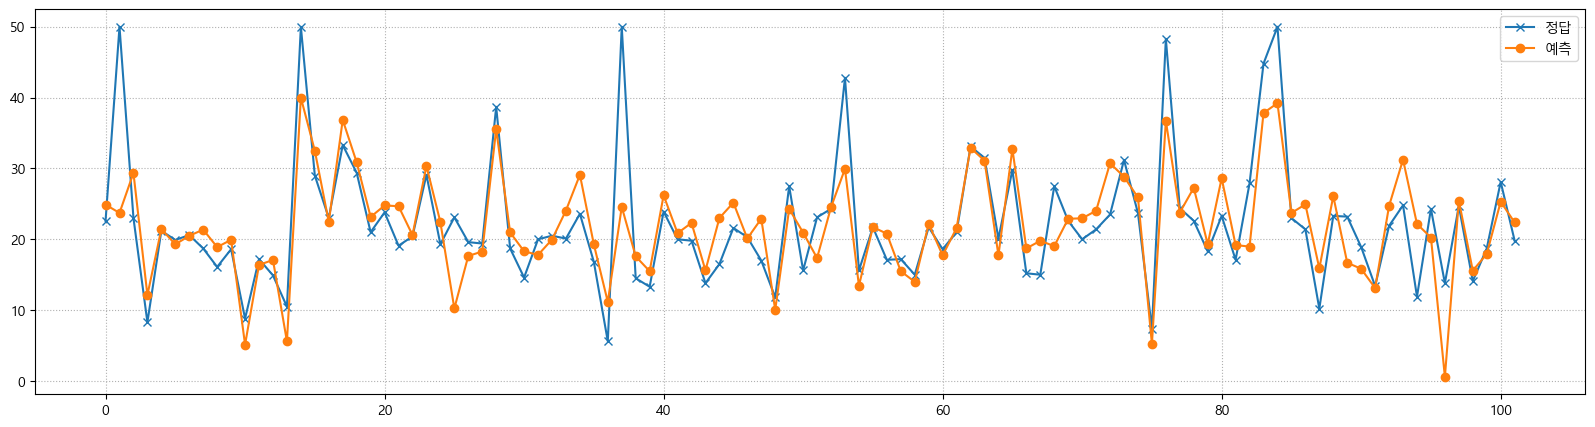

In [ ]:
### y_test 정답과 추론값 비교 - 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
# X축: 몇번째 데이터에 대한 예측인지 index
y_test.index
plt.plot(range(y_test.size), y_test, marker="x", label="정답")
plt.plot(range(y_test.size), pred, marker='o', label="예측")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

위 그래프의 X축은 인덱스 번호임

# 다항회귀 (Polynomial Regression)
- **전처리방식** 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다. 통계학에서 다루는 다항회귀와는 좀 달라요!!
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터(Coef, weight)를 기준으로는 일차식이 되어 선형모델이다. 그렇지만 input 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# 모델링을 통해 찾아야 하는 함수.
def func(X):
    return X**2 + X + 2 + np.random.normal(0,1, size=(X.size, 1))
    
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = func(X)
y = y.flatten()

print(X.shape, y.shape)

(100, 1) (100,)


In [10]:
print(y[:10])
print(X[:5])

[ 1.21351048  5.85899537  3.46241391  0.80557742  3.24001022  5.53751717
  2.94453566  9.6962122  11.45061754  2.8441925 ]
[[ 0.29288102]
 [ 1.2911362 ]
 [ 0.61658026]
 [ 0.2692991 ]
 [-0.4580712 ]]


선형회귀 모델을 통해서 X**2 + X + 2를 찾는 거임.

`def func(X):`

`   return X**2 + X + 2 + np.random.normal(0,1, size=(X.size, 1))`
뒤에 더해준 건 노이즈!!

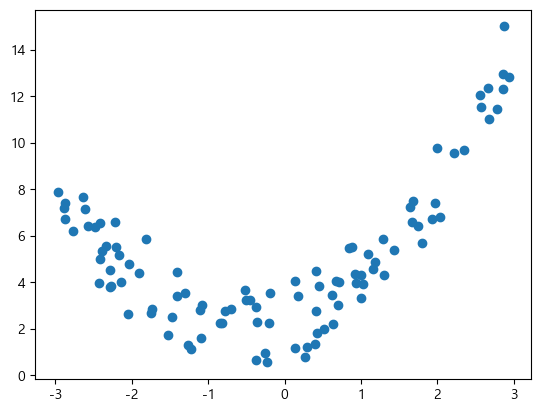

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,  y)
plt.show()

##### 모델생성, 학습

In [12]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

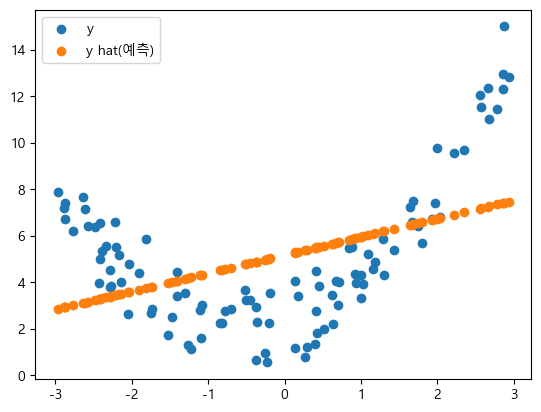

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X,  y, label="y")
plt.scatter(X, pred, label='y hat(예측)')
plt.legend()
plt.show()

선형회귀 모델이 이 데이터와는 맞지 않다!! ㅠㅠ

In [14]:
lr.coef_, lr.intercept_

(array([0.78189543]), np.float64(5.175619278567209))

In [15]:
from metrics import print_regression_metrcis
print_regression_metrcis(y, pred)

MSE: 7.729204760808937
RMSE: 2.7801447373848966
R Squared: 0.19138252437306003


##### PolynomialFeatures를 이용해 다항회귀구현

In [16]:
X.shape

(100, 1)

In [76]:
from sklearn.preprocessing import PolynomialFeatures
pnf = PolynomialFeatures(
    degree=2,            # 최고차항의 차수. ex) degree=4로 하면: x(원래 컬럼), x^2, x^3, x^4  한 feature추가.
    include_bias=False,  #True(기본값) - 상수항 feature 생성여부. (모든 값이 1인 feature 추가여부)
)
# pnf.fit(X)
# pnf.transform(X)
X_poly = pnf.fit_transform(X)

In [77]:
print(X.shape, X_poly.shape)

(100, 1) (100, 2)


In [78]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [79]:
X[:3]

array([[0.29288102],
       [1.2911362 ],
       [0.61658026]])

In [80]:
X_poly[:3]

array([[0.29288102, 0.08577929],
       [1.2911362 , 1.66703268],
       [0.61658026, 0.38017121]])

##### LinearRegression 모델을 이용해 평가

In [81]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

선형회귀 모형에 x^2 항을 넣어줌으로서 2차 회귀 효과를 내는 거임!!

In [82]:
lr2.coef_, lr2.intercept_

(array([0.97906552, 0.94978823]), np.float64(2.3405007562628866))

##### 시각화

In [83]:
X_new = np.linspace(-3, 3, 1000)[..., np.newaxis]  # (1000, ) -> (1000, 1)
X_new_poly = pnf.transform(X_new)
# X_new_poly.shape
y_hat = lr2.predict(X_new_poly)

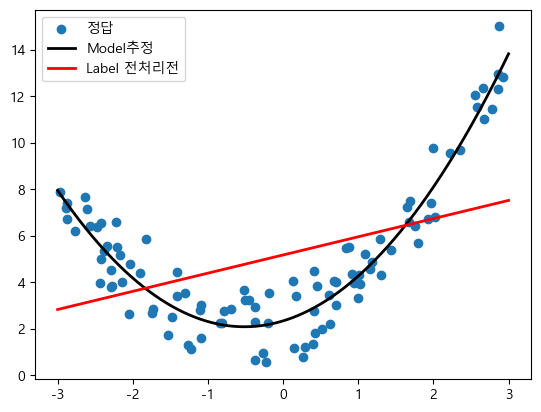

In [84]:
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = "malgun gothic"
# plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='k', linewidth=2, label="Model추정")
plt.plot(X_new, lr.predict(X_new), color="r", linewidth=2, label="Label 전처리전")
plt.legend()
plt.show()

In [71]:
# 평가 (degree = 2)
from metrics import print_regression_metrcis
print_regression_metrcis(y, lr2.predict(X_poly))

MSE: 0.9735576723414217
RMSE: 0.9866902616026073
R Squared: 0.8981478985551461


In [65]:
# 평가 (degree = 3)
from metrics import print_regression_metrcis
print_regression_metrcis(y, lr2.predict(X_poly))

MSE: 0.9711464556716113
RMSE: 0.9854676329903541
R Squared: 0.8984001563225451


In [74]:
# 평가 (degree = 4)
from metrics import print_regression_metrcis
print_regression_metrcis(y, lr2.predict(X_poly))

MSE: 0.9707499306375591
RMSE: 0.9852664262206234
R Squared: 0.8984416401597548


## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [85]:
pnf3 = PolynomialFeatures(degree=25, include_bias=False)
X_poly3 = pnf3.fit_transform(X)
print(X_poly3.shape)
lr3 = LinearRegression()
lr3.fit(X_poly3, y)

(100, 25)


LinearRegression()

In [86]:
pred3 = lr3.predict(X_poly3)
print_regression_metrcis(y, pred3)

MSE: 0.8369908307238718
RMSE: 0.914872029698073
R Squared: 0.9124353107974852


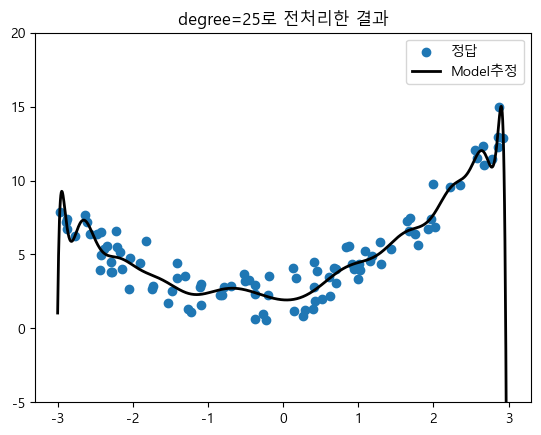

In [89]:
# degree=25 시각화
# X_new: -3 ~ 3 사이의 실수들수들
y_hat = lr3.predict(pnf3.transform(X_new))
plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='k', linewidth=2, label="Model추정")
plt.legend()
plt.title("degree=25로 전처리한 결과")
plt.ylim(-5, 20) # y값 범위 지정
plt.show()

### PolynomialFeatures 예제

In [90]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
data = np.arange(12).reshape(6, 2)
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [91]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
poly2 = pnf.fit_transform(data)
poly2.shape

(6, 5)

In [92]:
# 변환 후 각 feature를 어떻게 계산했는지 조회
pnf.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [93]:
poly2

array([[  0.,   1.,   0.,   0.,   1.],
       [  2.,   3.,   4.,   6.,   9.],
       [  4.,   5.,  16.,  20.,  25.],
       [  6.,   7.,  36.,  42.,  49.],
       [  8.,   9.,  64.,  72.,  81.],
       [ 10.,  11., 100., 110., 121.]])

In [94]:
pd.DataFrame(poly2, columns=pnf.get_feature_names_out())

,x0,x1,x0^2,x0 x1,x1^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0
3,6.0,7.0,36.0,42.0,49.0
4,8.0,9.0,64.0,72.0,81.0
5,10.0,11.0,100.0,110.0,121.0


In [95]:
pnf2 = PolynomialFeatures(degree=5, include_bias=False)
poly_n = pnf2.fit_transform(data)
poly_n.shape, data.shape

((6, 20), (6, 2))

2개에서 20개로 늘어남! 교차항도 있어서~~

In [96]:
pnf2.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

2차, 3차, .... 교차까지 하면서 기하급수적으로 늘어난다.

### PolynomialFeatures를 Boston Dataset에 적용

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from metrics import print_regression_metrcis

df = pd.read_csv('data/boston_dataset.csv')
X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

데이터셋 읽어오고~ 집 값 y로 만들고~ train test 분리!

In [98]:
# 전처리 pipeline
preprocessor = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), 
    ("scaler", StandardScaler()), 
])

전처리 할 때 순서가 중요한가요? YES!!
poly 먼저 하고 scaler를 만들어준다.
전처리해주는 파이프라인 생성!

In [99]:
tmp = preprocessor.fit_transform(X_train)

임시 확인용으로 tmp라고 해놨어요~~

In [100]:
X_train.shape

(404, 13)

In [101]:
tmp.shape

(404, 104)

원래 X_train feature는 13개인데, 전처리한 tmp는 104개까지 늘어났어요! (헐~)

In [105]:
preprocessor.steps

[('poly', PolynomialFeatures(include_bias=False)),
 ('scaler', StandardScaler())]

PolynomialFeatures(include_bias=False)를 빼내자! => preprocessor.steps[0][1]

In [106]:
preprocessor.steps[0][1].get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

#### 모델링

원래는 전처리 pipeline 구축할 때 ("model", LinearRegression()) 넣는데, 위에서는 연습으로 전처리기 따로 만들어서 먼저 보고 모델도 파이프라인에 합쳐줌

In [108]:
# 파이프라인 구축
pipeline = Pipeline([
    ("preprocessor", preprocessor), 
    ("model", LinearRegression())
])

In [109]:
# 학습
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('poly',
                                  PolynomialFeatures(include_bias=False)),
                                 ('scaler', StandardScaler())])),
                ('model', LinearRegression())])

In [110]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [111]:
print_regression_metrcis(y_train, pred_train, "Train set")

Train set
MSE: 4.340278052012258
RMSE: 2.0833333991496077
R Squared: 0.9490240966612833


In [112]:
print_regression_metrcis(y_test, pred_test, "Test set")

Test set
MSE: 31.277814971446723
RMSE: 5.592657237078518
R Squared: 0.6158858584078919


## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
  - MSE(손실함수)는 예측값과 실제값 간의 오차를 계산한다.이때 L2 규제를 적용하면, 손실함수에 가중치의 제곱합(∑wᵢ²)을 더해 오차를 인위적으로 크게 만든다.
      - 이로 인해 모델이 오차를 최소화하려면 가중치의 크기를 줄여야 한다.
      - 결과적으로 가중치들이 0에 가까운 값으로 수렴하게 된다.
      - 이는 각 feature의 영향력을 줄여서 모델이 과도하게 복잡해지는 것을 방지한다. 즉 모델의 복잡도를 낮추고 일반화 성능을 향상시킨다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/boston_dataset.csv')
X = df.drop(columns='MEDV')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 전처리
## Ridge Regression은 LinearRegression 모델과 같은 공식의 모델임. 단지 최적화 방법이 다른 것 뿐이다.
## 그래서 데이터 전처리는 연속형 Feature는 Feature Scaling을 범주형 Feature는 One Hot Encoding을 한다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 규제 alpha 에 따른 weight 변화

릿지라고 하는 클래스가 따로 있어용 (라쏘도)

우리가 조정할 수 있는 수는 알파 뿐~~!!

알파값이 클수록 규제를 강화하는 것임! weight들이 0에 더 가깝게 변경이 될 것이다. => 더 단순한 모델을 만든다.
- overfitting: alpha를 키운다.
- underfitting: alpha를 작게 한다.

feature에 곱해지는 파라미터 값이 어떻게 변하는지 보아요!

feature는 데이터프레임에, bias는 리스트에 저장한다.

In [115]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df = pd.DataFrame() 
bias_list = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    # 모델 생성 -> hyper parameter alpha 를 설정.
    model = Ridge(alpha=alpha, random_state=0)
    # 학습
    model.fit(X_train_scaled, y_train)
    # 학습 후 찾은 weight와 bias를 저장.
    coef_df[f"{alpha}"] = model.coef_ # 배열을 데이터프레임에 저장
    bias_list.append(model.intercept_) # 편향을 리스트에 저장
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

Alpha 0.001 - Train: 0.7730135569106857, Test: 0.5892212945055593
Alpha 0.01 - Train: 0.7730135553534745, Test: 0.589211481504676
Alpha 0.1 - Train: 0.7730134004374536, Test: 0.5891134222735188
Alpha 1 - Train: 0.7729986739069825, Test: 0.5881400471345535
Alpha 10 - Train: 0.772025270378812, Test: 0.5791628807875258
Alpha 100 - Train: 0.7515163225742546, Test: 0.5272685191319559
Alpha 500 - Train: 0.6588192082625857, Test: 0.42879808129182595
Alpha 1000 - Train: 0.5728326430134054, Test: 0.3655172284411424


처음 꺼가 제일 좋았네용..

가면 갈수록 단순한 모델이 되어가는 걸 알 수 있다. train 점수도 떨어지고 있죠!

In [116]:
coef_df.index = X_train.columns

In [117]:
coef_df

,0.001,0.01,0.1,1,10,100,500,1000
CRIM,-0.970811,-0.970732,-0.969942,-0.962257,-0.901965,-0.708783,-0.543189,-0.453716
ZN,1.057132,1.056981,1.055479,1.040872,0.926287,0.602925,0.475571,0.416153
INDUS,0.038283,0.038034,0.035549,0.011680,-0.157051,-0.481556,-0.547926,-0.504161
CHAS,0.594511,0.594550,0.594942,0.598719,0.625918,0.662516,0.506250,0.369364
NOX,-1.855112,-1.854790,-1.851578,-1.820134,-1.560302,-0.702047,-0.405744,-0.374977
RM,2.573230,2.573329,2.574308,2.583786,2.653906,2.643872,1.813405,1.294925
AGE,-0.087623,-0.087694,-0.088395,-0.095188,-0.146581,-0.263320,-0.317919,-0.322093
DIS,-2.880909,-2.880612,-2.877636,-2.848263,-2.588020,-1.393256,-0.358183,-0.078157
RAD,2.112167,2.111458,2.104394,2.036231,1.533846,0.322752,-0.210082,-0.290222
TAX,-1.875259,-1.874610,-1.868146,-1.806092,-1.370452,-0.612679,-0.519593,-0.478899


alpha 값이 커질수록 weight가 0에 가까워지는 걸 볼 수 있다. 

In [118]:
bias_list

[np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804)]

bias는 모델과 상관없이 똑같다. 규제사항은 weight에만 영향을 주는 것임.

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
  - MSE(손실함수)는 예측값과 실제값 간의 오차를 계산한다.이때 L1 규제를 적용하면, 손실함수에 가중치 절댓값의 합(∑|wᵢ|) 을 추가한다.
    - 이로 인해 손실값이 커지고, 모델은 손실을 줄이기 위해 가중치 중 일부를 정확히 0으로 만든다.
    - 결과적으로 불필요한 feature의 가중치가 0이 되어 모델에서 제외된다. 즉, feature selection이 자동으로 일어난다.
    -  이는 모델 해석력을 높이고,  불필요한 특성이 개입되는 것을 막아 일반화 성능을 높이는 효과를 준다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [119]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df2 = pd.DataFrame() 
bias_list2 = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    model = Lasso(alpha=alpha, random_state=0)
    model.fit(X_train_scaled, y_train)
    coef_df2[f"{alpha}"] = model.coef_
    bias_list2.append(model.intercept_)
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

Alpha 0.001 - Train: 0.773012729511684, Test: 0.5890287763120772
Alpha 0.01 - Train: 0.7729557113377097, Test: 0.5874763161420908
Alpha 0.1 - Train: 0.7676692732920614, Test: 0.5663726208397636
Alpha 1 - Train: 0.7066864437965619, Test: 0.5069663003862215
Alpha 10 - Train: 0.0, Test: -0.001889737528507185
Alpha 100 - Train: 0.0, Test: -0.001889737528507185
Alpha 500 - Train: 0.0, Test: -0.001889737528507185
Alpha 1000 - Train: 0.0, Test: -0.001889737528507185


알파가 10부터 결과가 똑같이 나온다 => 규제가 강화되면서 모델이 너무 단순화됨.

In [120]:
bias_list2

[np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118804),
 np.float64(22.611881188118808),
 np.float64(22.611881188118808),
 np.float64(22.611881188118808),
 np.float64(22.611881188118808)]

In [121]:
coef_df2.index = X_train.columns

In [122]:
coef_df2

,0.001,0.01,0.1,1,10,100,500,1000
CRIM,-0.967874,-0.940302,-0.663468,-0.000000,-0.0,-0.0,-0.0,-0.0
ZN,1.053234,1.021582,0.701524,0.000000,0.0,0.0,0.0,0.0
INDUS,0.028566,-0.000000,-0.130724,-0.000000,-0.0,-0.0,-0.0,-0.0
CHAS,0.594814,0.594840,0.588934,0.000000,0.0,0.0,0.0,0.0
NOX,-1.848201,-1.804075,-1.358749,-0.000000,-0.0,-0.0,-0.0,-0.0
RM,2.574014,2.585398,2.722754,2.540098,0.0,0.0,0.0,0.0
AGE,-0.085817,-0.069486,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
DIS,-2.874999,-2.809365,-2.140932,-0.000000,0.0,0.0,0.0,0.0
RAD,2.093952,1.956109,0.640853,-0.000000,-0.0,-0.0,-0.0,-0.0
TAX,-1.857546,-1.738284,-0.658779,-0.171527,-0.0,-0.0,-0.0,-0.0


### PolynormialFeatures로 전처리한 Boston Dataset 에 Ridge, Lasso 규제 적용

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

preprocessor = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), 
    ("scaler", StandardScaler()), 
])

In [124]:
X_train_poly = preprocessor.fit_transform(X_train)
X_test_poly = preprocessor.transform(X_test)

In [125]:
X_train_poly.shape

(404, 104)

##### LinearRegression으로 평가

In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from metrics import print_regression_metrcis

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print_regression_metrcis(y_train, lr.predict(X_train_poly))
print('-------------------------------------')
print_regression_metrcis(y_test, lr.predict(X_test_poly))

MSE: 4.340278052012258
RMSE: 2.0833333991496077
R Squared: 0.9490240966612833
-------------------------------------
MSE: 31.277814971446723
RMSE: 5.592657237078518
R Squared: 0.6158858584078919


추가할 파라미터 없음

##### Ridge 의 alpha값 변화에 따른 R square 확인

In [127]:
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 20]
train_r2 = []
test_r2 = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_poly, y_train)
    train_r2.append(r2_score(y_train, ridge.predict(X_train_poly)))
    test_r2.append(r2_score(y_test, ridge.predict(X_test_poly)))

alpha를 파라미터로 지정해줘야함

In [128]:
ridge_df = pd.DataFrame({"alpha":alpha_list, "train":train_r2, "test":test_r2})
ridge_df.set_index("alpha", inplace=True)
ridge_df

,train,test
alpha,,
0.001,0.948809,0.623663
0.010,0.947669,0.636538
0.100,0.941685,0.667476
1.000,0.929584,0.742633
10.000,0.898313,0.740306
20.000,0.881200,0.718677


train은 계속 떨어지지만 test는 계속 올라가고 있다.

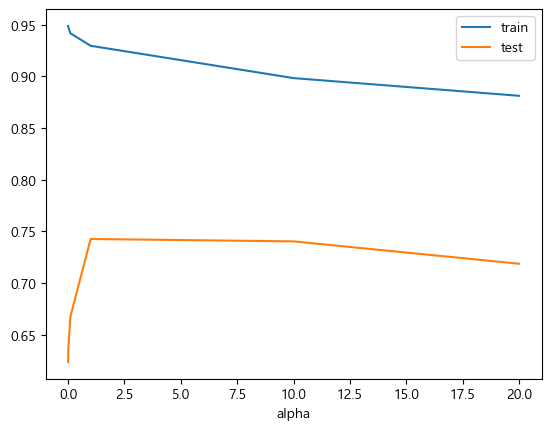

In [129]:
ridge_df.plot();

##### lasso 의 alpha값 변화에 따른 R square 확인

In [ ]:
import warnings
warnings.filterwarnings('ignore')

warning 모듈! filterwarning을 ignore할 거라는 뜻

In [130]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 20]
train_r2 = []
test_r2 = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_poly, y_train)
    train_r2.append(r2_score(y_train, lasso.predict(X_train_poly)))
    test_r2.append(r2_score(y_test, lasso.predict(X_test_poly)))

c:\Anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+03, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(
c:\Anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.264e+02, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(


In [131]:
lasso_df = pd.DataFrame({"alpha":alpha_list, "train":train_r2, "test":test_r2})
lasso_df.set_index("alpha", inplace=True)
lasso_df

,train,test
alpha,,
0.001,0.934216,0.600479
0.010,0.926367,0.678741
0.100,0.859929,0.706008
1.000,0.754489,0.586474
10.000,0.000000,-0.001890
20.000,0.000000,-0.001890


## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.5, l1_ratio=0.3)
model.fit(X_train_poly, y_train)

In [ ]:
print_regression_metrcis(y_train, model.predict(X_train_poly), "==========Trainset")
print_regression_metrcis(y_test, model.predict(X_test_poly), "==========Testset")

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.